### a simple linear autoencoder

In [1]:
import tensorflow as tf
from tensorflow.contrib.layers import fully_connected

n_inputs = 3          # 3D inputs 
n_hidden = 2          # 2D codings
n_outputs = n_inputs

learning_rate = 0.01

X = tf.placeholder(tf.float32, shape=[None, n_inputs])

hidden = fully_connected(X, n_hidden, activation_fn=None)
outputs = fully_connected(hidden, n_outputs, activation_fn=None)

reconstruction_loss = tf.reduce_mean(tf.square(outputs - X))       # MSE 

optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(reconstruction_loss)

init = tf.global_variables_initializer()

### data

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X_iris = iris.data[:,:3]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X_iris, y, test_size=0.5, random_state=0)

### autoencoder

In [3]:
n_iterations = 1000
codings = hidden     # the output of the hidden layer provides the codings

In [13]:
with tf.Session() as sess: 
    init.run()
    for iteration in range(n_iterations):
        training_op.run(feed_dict={X: X_train}) # no labels (unsupervised)
    codings_val = codings.eval(feed_dict={X: X_test})

In [5]:
codings_val.shape

(75, 2)

### visualization

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

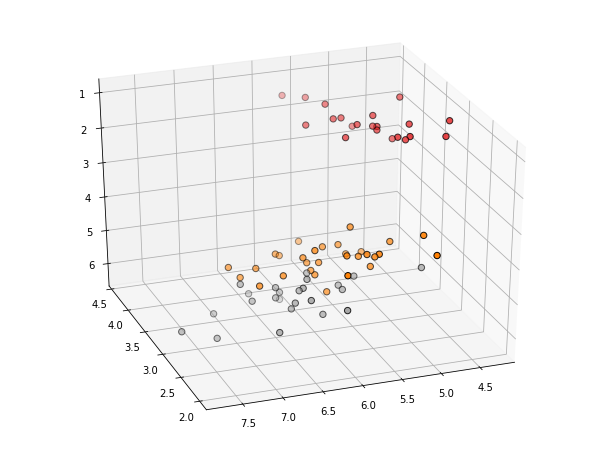

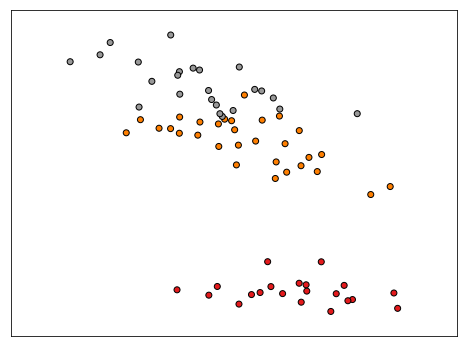

In [7]:
fig = plt.figure(2, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_original = X_test
ax.scatter(X_original[:, 0], X_original[:, 1], X_original[:, 2], c=y_test, cmap=plt.cm.Set1, edgecolor='k', s=40)

x_min, x_max = codings_val[:, 0].min() - .5, codings_val[:, 0].max() + .5
y_min, y_max = codings_val[:, 1].min() - .5, codings_val[:, 1].max() + .5

# plot the encoded 2-d data
plt.figure(1, figsize=(8, 6))
plt.clf()

plt.scatter(codings_val[:, 0], codings_val[:, 1], c=y_test, cmap=plt.cm.Set1, edgecolor='k')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [8]:
from bokeh.plotting import figure
from bokeh.io import show, output_notebook

In [9]:
import pandas as pd

df = pd.DataFrame(codings_val, columns=['neuron_1', 'neuron_2'])
df['target'] = y_test
df['color'] = df.target.apply(lambda x: "#3366cc" if x==0 else "#dc3912" if x==1 else "#ff9900")

In [10]:
plot = figure(plot_width=600, plot_height=600)
plot.circle(df['neuron_1'], df['neuron_2'], size=12, color=df['color'], alpha=0.5)

output_notebook()
show(plot)

Loading BokehJS ...

In [12]:
with tf.Session() as sess:
    writer = tf.summary.FileWriter("autoencoderL", sess.graph)
    print(sess.run(init))
    writer.close()

None
